In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic') #한글 깨짐 방지 
plt.rcParams['axes.unicode_minus'] = False #한글 깨짐 방지 
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [49]:
import seaborn as sns
import numpy as np

# 📌 Q1. 전국 시도별 약국수를 구해주세요!
## 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [2]:
df['상권업종소분류명'].unique() #

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [3]:
# 약국인 데이터만 seoul_drug_store 변수에 담기
seoul_drug_store = df[df['상권업종소분류명'] == '약국'] #상권업종소분류명이 약국인가에 대한 불린인덱싱
seoul_drug_store['상권업종소분류명'].value_counts() #불린인덱싱 결과에서 True, 즉 약국에 해당하는 데이터만 인덱싱해서 가져옴

약국    18964
Name: 상권업종소분류명, dtype: int64

In [44]:
seoul_drug_store['시도명'].value_counts() #각 시도마다 약국이 얼마나 있는지 확인 

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

<AxesSubplot:xlabel='경도', ylabel='위도'>

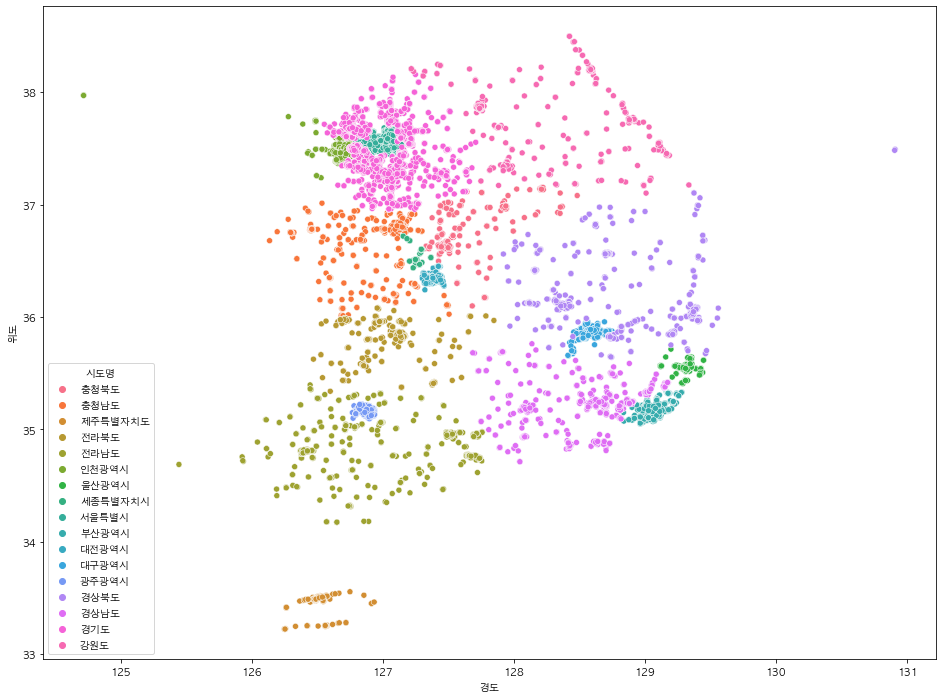

In [50]:
#scatterplot 시각화
plt.figure(figsize=(16, 12))
sns.scatterplot(data=seoul_drug_store, x="경도", y="위도", hue="시도명")

# 📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

## 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!

In [59]:
df['상권업종중분류명'].unique() #중분류명 확인 

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [60]:
vet = df[df['상권업종중분류명'] == '수의업'] #수의업만 vet 변수에 저장. 
vet

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
5,20809147,행신동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4128112800106470014011094,NaN,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,NaN,1,NaN,126.831632,37.619309
12,21145534,목포동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4611010200110500078000665,NaN,전라남도 목포시 영산로 200-1,530806.0,58708.0,NaN,1,NaN,126.390244,34.799439
20,21085006,제일가축병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4136037021102040012005537,NaN,경기도 남양주시 퇴계원면 경춘북로558번길 7-7,472821.0,12126.0,NaN,1,NaN,127.146600,37.647633
23,21228408,강남애견,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,4717012700101640048027271,현대아파트상가,경상북도 안동시 경동로 481,760270.0,36655.0,NaN,NaN,NaN,128.711663,36.566452
25,21055738,축협동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4671025025103420000000164,NaN,전라남도 담양군 담양읍 삼거리길 8-6,517806.0,57347.0,NaN,1,NaN,126.981972,35.310645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91173,16365977,해운대플러스동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2635010700113150000015591,해운대삼정코아주상복합,부산광역시 해운대구 세실로 48,612840.0,48110.0,101,1,1-2,129.178469,35.170034
91174,16365867,반창꼬동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4163011400110490001000001,NaN,경기도 양주시 옥정로 151,482130.0,11479.0,NaN,NaN,302,127.090349,37.815362
91213,16131045,서진동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4513014400105010000028021,현대아파트,전라북도 군산시 나운안2길 8,573778.0,54135.0,102,NaN,905,126.705522,35.967977
91242,16109069,아크리스동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,1168010500101600021015764,동화빌딩,서울특별시 강남구 봉은사로104길 10,135881.0,6170.0,NaN,3,NaN,127.061898,37.513707


In [82]:
vet['시도명'].value_counts() #부스트코스 예시와는 다름. 수의업 포함하지 않는 것 같음. 

경기도        1518
서울특별시       841
부산광역시       353
경상남도        323
경상북도        302
인천광역시       284
대구광역시       257
충청남도        238
전라북도        195
강원도         166
전라남도        158
충청북도        151
대전광역시       149
광주광역시       147
울산광역시       116
제주특별자치도      82
세종특별자치시      19
Name: 시도명, dtype: int64

In [83]:
vet_doc = vet[vet['상권업종소분류명']== '동물병원']
vet_doc['시도명'].value_counts() #부스트코스 예시와 같음. 부스트코스는 수의업은 포함하지 않고, 동물병원만 포함. 

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

<AxesSubplot:xlabel='경도', ylabel='위도'>

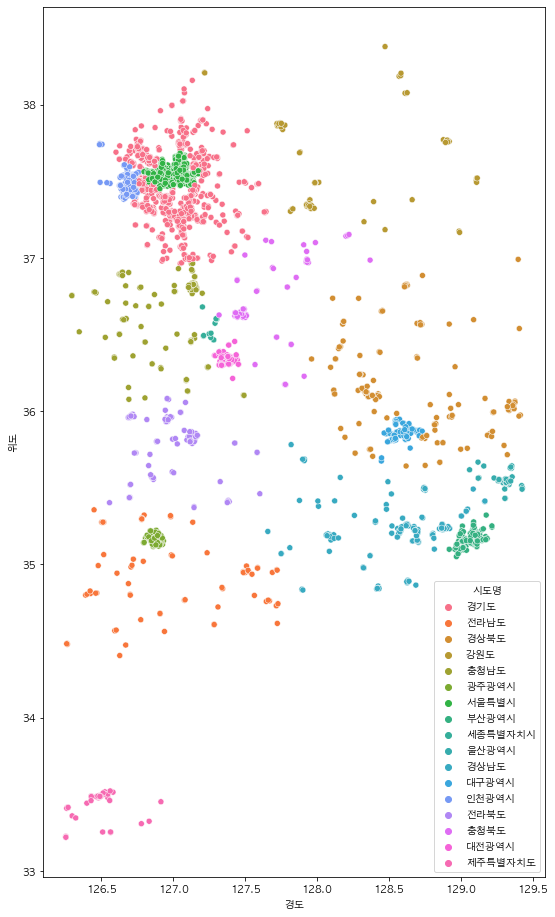

In [91]:
#scatterplot 시각화
plt.figure(figsize=(9, 16))
sns.scatterplot(data=vet_doc, x="경도", y="위도", hue="시도명")

# 📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

## 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
## 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
## 비율이 높은 순서대로 정렬되게 구해주세요!
## 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
## 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [100]:
df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [102]:
seoul_hospital = df[(df['상권업종중분류명'] == '병원') & (df['시도명'] == '서울특별시')] #서울에 있는 모든 병원 seoul_hospital 변수에 저장. 
seoul_hospital

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
41,20916395,이태형한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1135010600105060000010657,브라운스톤중계,서울특별시 노원구 동일로203가길 29,139880.0,1779.0,NaN,2,NaN,127.064245,37.639918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91297,16109247,위례이사랑치과,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,1171010900100030001000001,에스비트램스퀘어,서울특별시 송파구 위례광장로 200,138926.0,5849.0,NaN,NaN,504,127.142888,37.481200
91316,16108615,리엔장의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1144012100101660013011794,삼양세븐스프링스,서울특별시 마포구 양화로18길 3,121818.0,4051.0,NaN,6,NaN,126.924553,37.557021
91318,16190911,동민피부과비뇨기과,NaN,S,의료,S01,병원,S01B12,비뇨기과,Q86201,...,1123010700102350001013495,미주아파트,서울특별시 동대문구 약령시로 147,130781.0,2489.0,NaN,NaN,NaN,127.045802,37.583788
91320,16131813,월계치과,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,1135010200109420000018688,월계역신도브래뉴,서울특별시 노원구 월계로 338,139847.0,1885.0,NaN,2,201,127.057988,37.629326


In [93]:
derma_ps = df[(df['상권업종소분류명'].str.contains('피부|성형')) & (df['시도명'] == '서울특별시')] #서울에 소재한 병원중 피부나 성형이 포함된 분류명. 
derma_ps.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
44,20912401,아미가성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1165010100109020001015305,원등빌딩,서울특별시 서초구 방배로20길 4,137060.0,6664.0,NaN,3,NaN,126.995334,37.485498
94,21859520,새롬성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1156010500104250037035858,NaN,서울특별시 영등포구 경인로 835,150034.0,7305.0,NaN,NaN,NaN,126.905647,37.516310
164,22838864,김종서성형,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105990004010396,압구정빌딩,서울특별시 강남구 논현로 842,135893.0,6025.0,NaN,2,NaN,127.028712,37.524027


In [104]:
#비율을 구하기 위해 각 데이터의 수 변수에 저장. 
seoul_hospital_value = seoul_hospital['시군구명'].value_counts()
derma_ps_value = derma_ps['시군구명'].value_counts()

In [106]:
ratio_derma_ps_all = (derma_ps_value/seoul_hospital_value).round(2)*100  #피부&성형외과 / 전체병원 비율 구하기 
ratio_derma_ps_all

강남구     24.0
강동구      7.0
강북구      5.0
강서구      7.0
관악구      4.0
광진구      6.0
구로구      6.0
금천구      5.0
노원구      5.0
도봉구      2.0
동대문구     4.0
동작구      4.0
마포구      9.0
서대문구     8.0
서초구     17.0
성동구      5.0
성북구      6.0
송파구      6.0
양천구      7.0
영등포구     8.0
용산구      5.0
은평구      6.0
종로구      3.0
중구       7.0
중랑구      7.0
Name: 시군구명, dtype: float64

<AxesSubplot:>

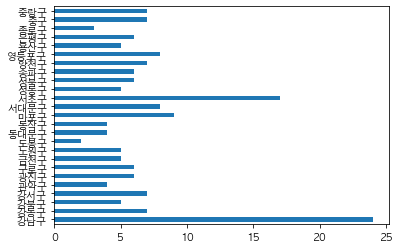

In [108]:
ratio_derma_ps_all.plot.barh() #barplot으로 시각화 

<AxesSubplot:ylabel='시군구명'>

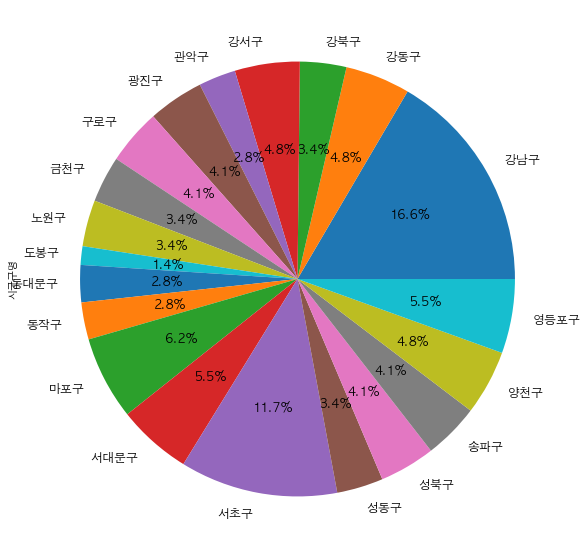

In [124]:
#pie 차트로 시각화하기
plt.figure(figsize = (16,10))
ratio_derma_ps_all.head(20).plot.pie(autopct = ('%.1f%%'),fontsize = 12)

In [33]:
ps = df[df['상권업종소분류명'].str.contains('성형')]
ps['상권업종소분류명'].value_counts()

정형/성형외과    2562
Name: 상권업종소분류명, dtype: int64

# 📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

## folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
## 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
## folium 문서 : https://python-visualization.github.io/folium/quickstart.html



In [125]:
old_alz = df[df['상권업종소분류명'] == '노인/치매병원'] #노인치매병원 old_alz 변수에 저장. 
old_alz.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132


In [129]:
import folium #folium import.

In [131]:
geo = old_alz.copy() #geo에 old.alz의 copy 저장 

In [132]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
fmap = folium.Map(location=[geo['위도'].mean(), geo['경도'].mean()],
                 zoom_start = 12)

for n in geo.index:
    popup_name = geo.loc[n, '상호명'] + '-' + geo.loc[n,'도로명주소']
    
    folium.Marker(
        location = [geo.loc[n,'위도'], geo.loc[n,'경도']],
        popup = popup_name,
        tooltip = popup_name).add_to(fmap)
fmap